In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
!pip install scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline

sns.set()
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
# Check for missing entries
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

284807 rows, 31 columns.

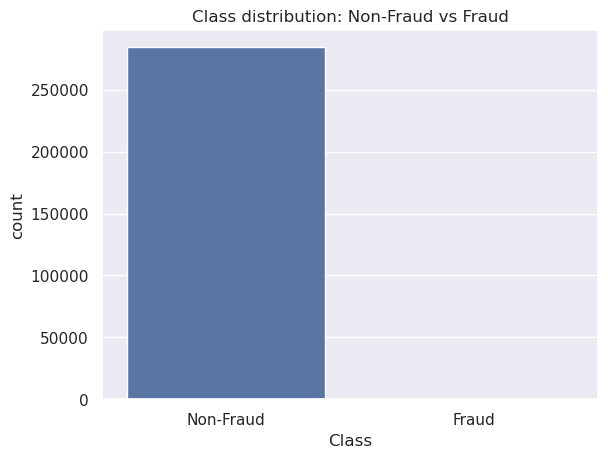

In [8]:
plt.figure()
sns.countplot(data = data, x = data.Class)
plt.xticks(np.arange(2), ['Non-Fraud', 'Fraud'])
plt.title('Class distribution: Non-Fraud vs Fraud')
plt.show();

Class is dominantly represented by non-fraud cases.

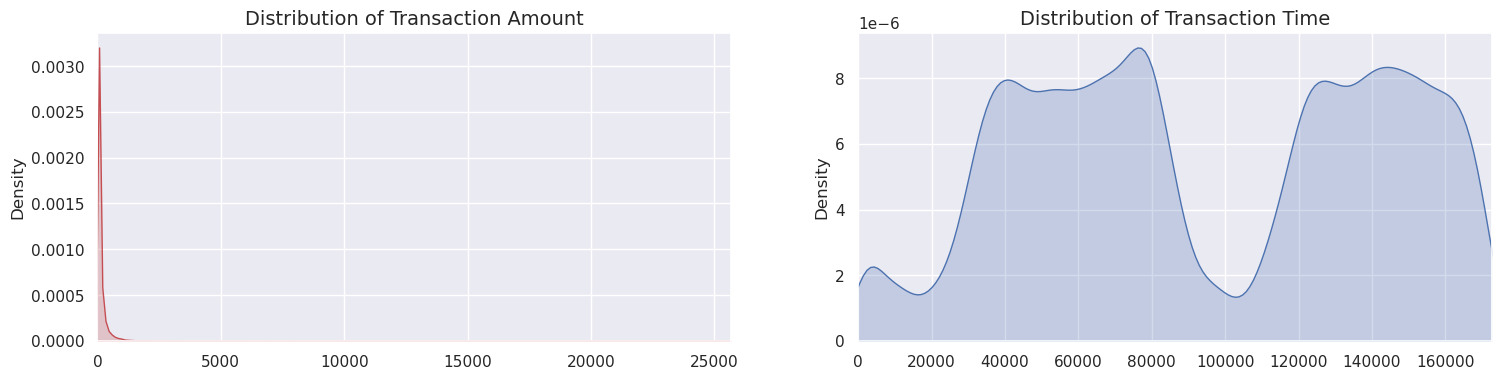

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.kdeplot(amount_val, ax=ax[0], color='r', fill = True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.kdeplot(time_val, ax=ax[1], color='b', fill = True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [10]:
data['Time'].values.reshape(-1,1)

array([[0.00000e+00],
       [0.00000e+00],
       [1.00000e+00],
       ...,
       [1.72788e+05],
       [1.72788e+05],
       [1.72792e+05]])

In [11]:
# Only Amount and Time are not scaled unlike the other columns in the data provided
# Scale Amount and Time

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data['scaled_time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

data.drop(['Time', 'Amount'], axis = 1, inplace = True)

In [12]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


# Dealing with class imbalance

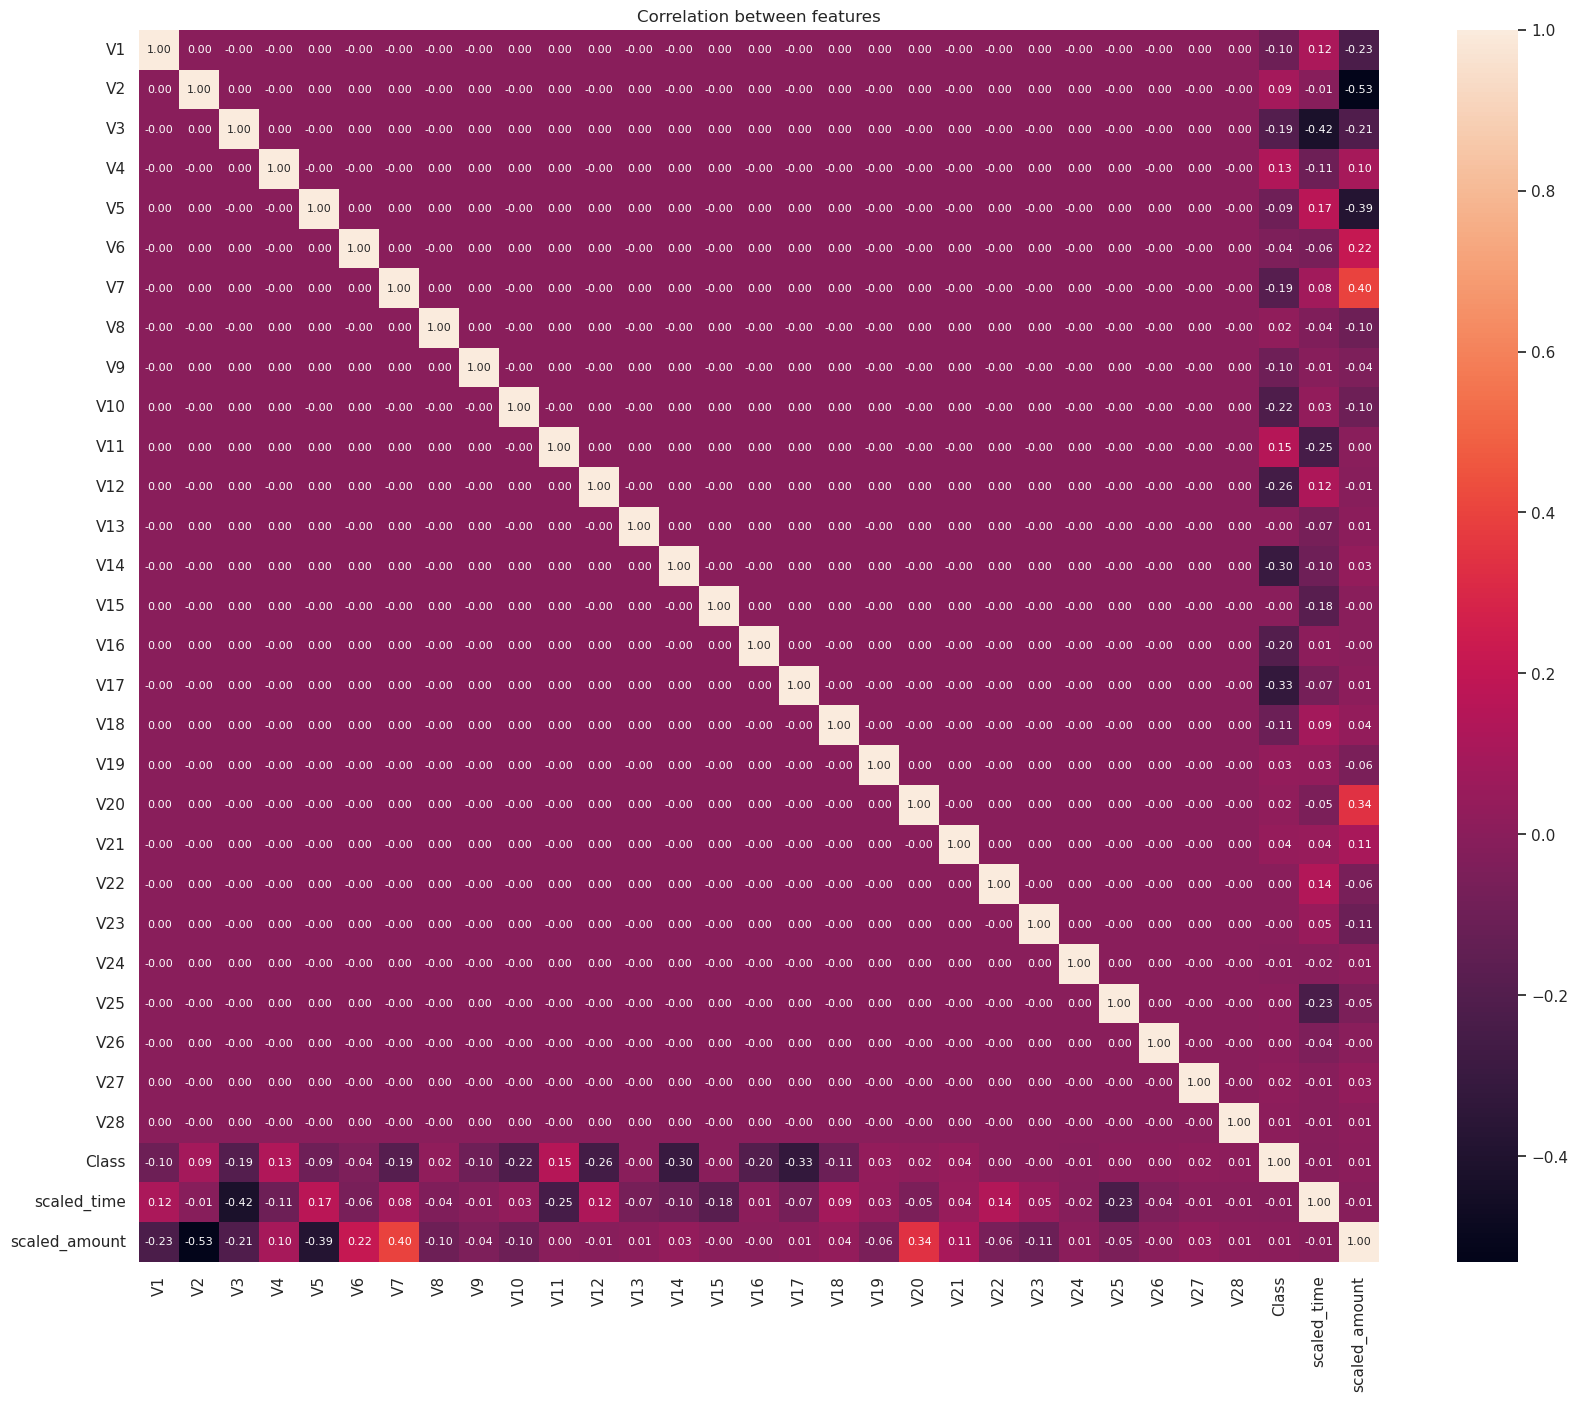

In [13]:
corr = data.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"fontsize": 8})
plt.title('Correlation between features')
plt.show()

*TOP 4*  
**Negative Correlations**: V10, V12, V14, V17  
**Positive Correlations**: V2, V4, V11, V21

## Correlations

In [14]:
feature_list = ['V10', 'V12', 'V14', 'V17', 'V2', 'V4','V11', 'V21']

### Negative Correlations

In [15]:
def plot_outliers(data, feature_list):
    plt.figure()
    fig, axes = plt.subplots(1,4, figsize = (24,16))
    for i, feat in enumerate(feature_list):
        sns.boxplot(x = data.Class, y = data[feat], ax = axes[i])
    plt.show()

<Figure size 640x480 with 0 Axes>

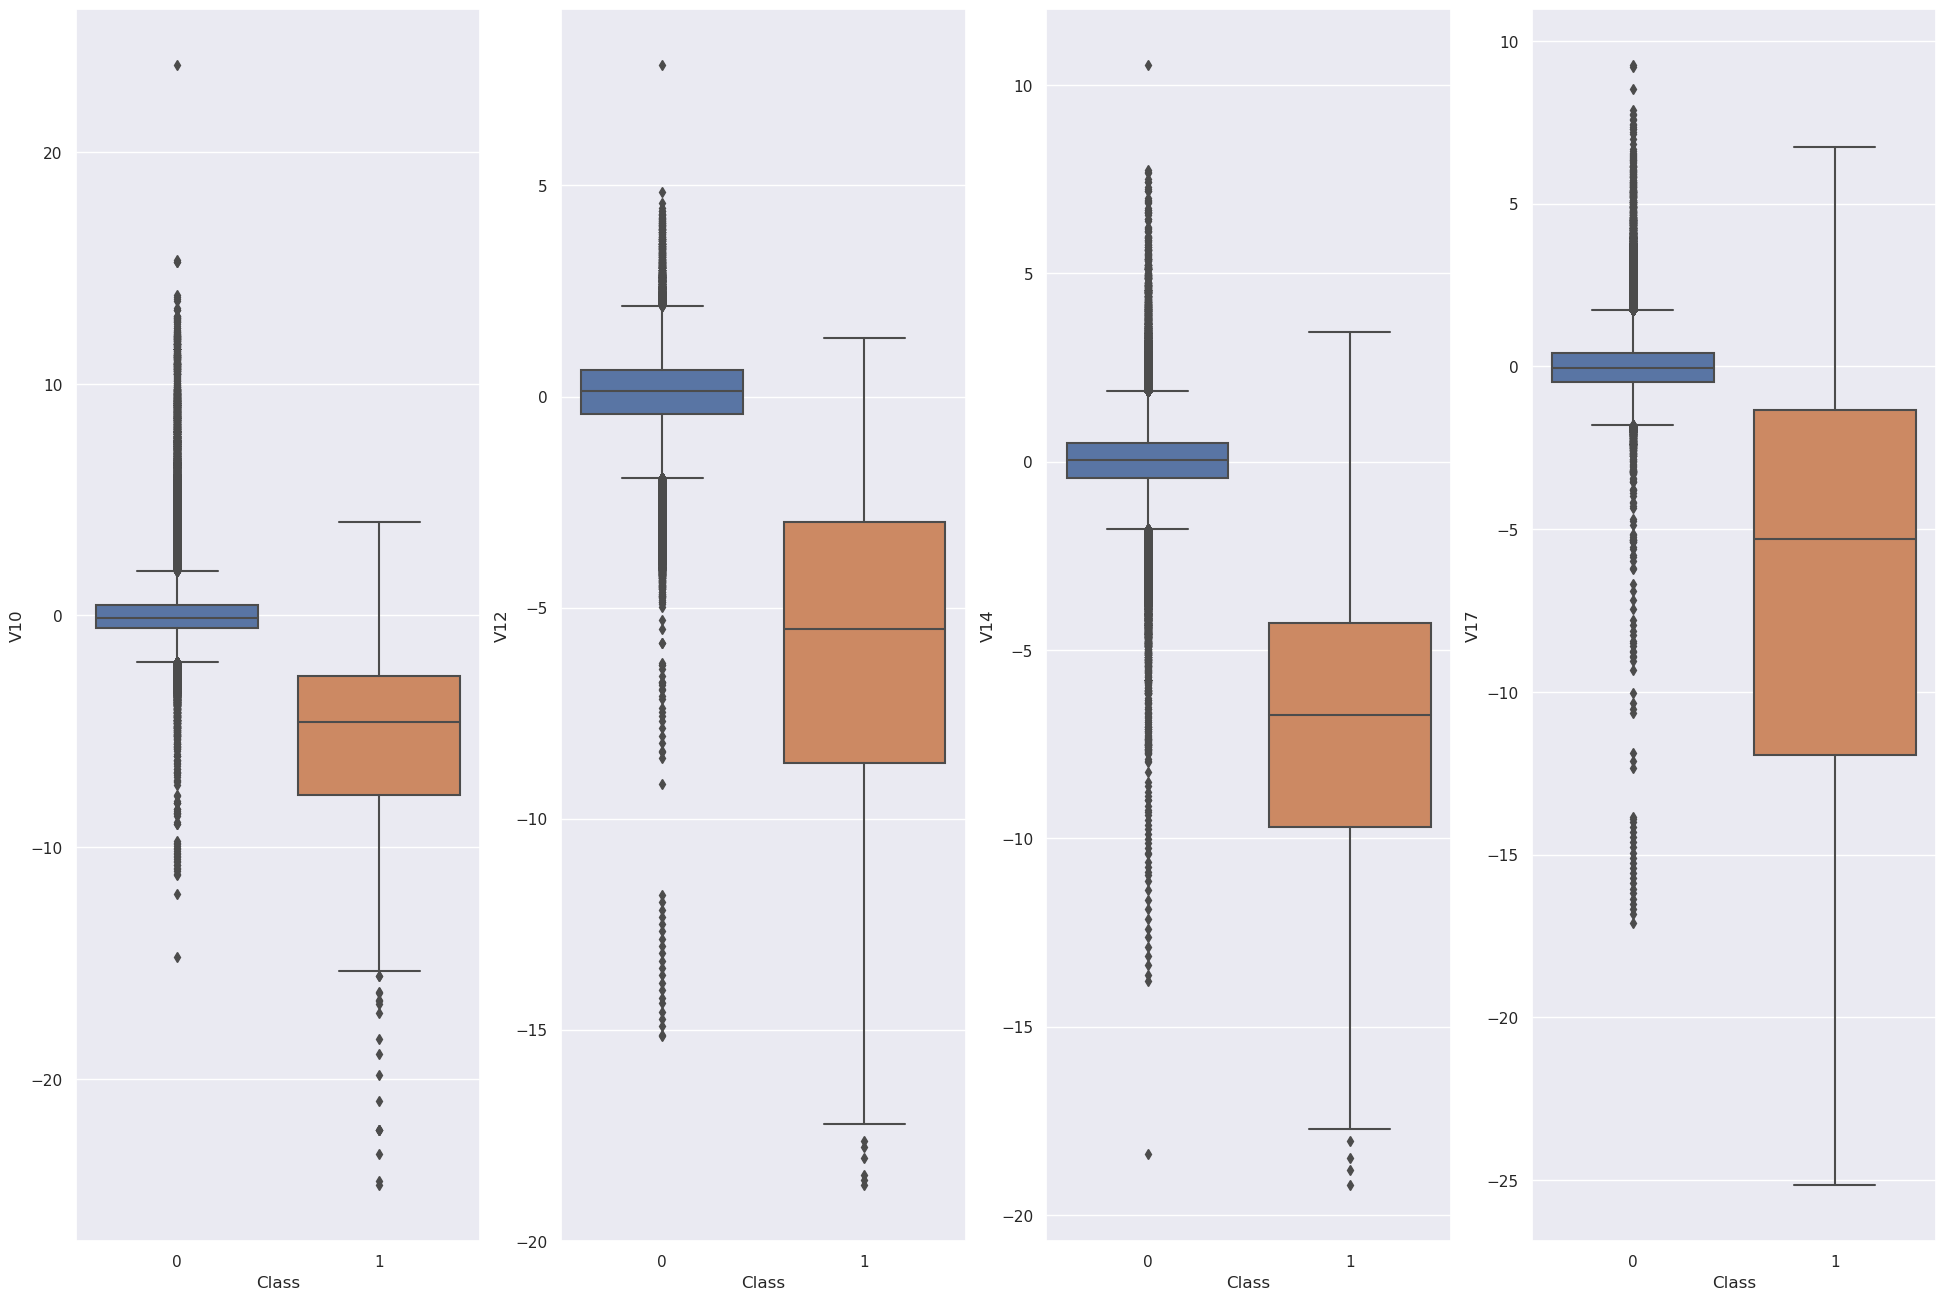

In [16]:
plot_outliers(data, feature_list[:4])

### Positive Correlations

<Figure size 640x480 with 0 Axes>

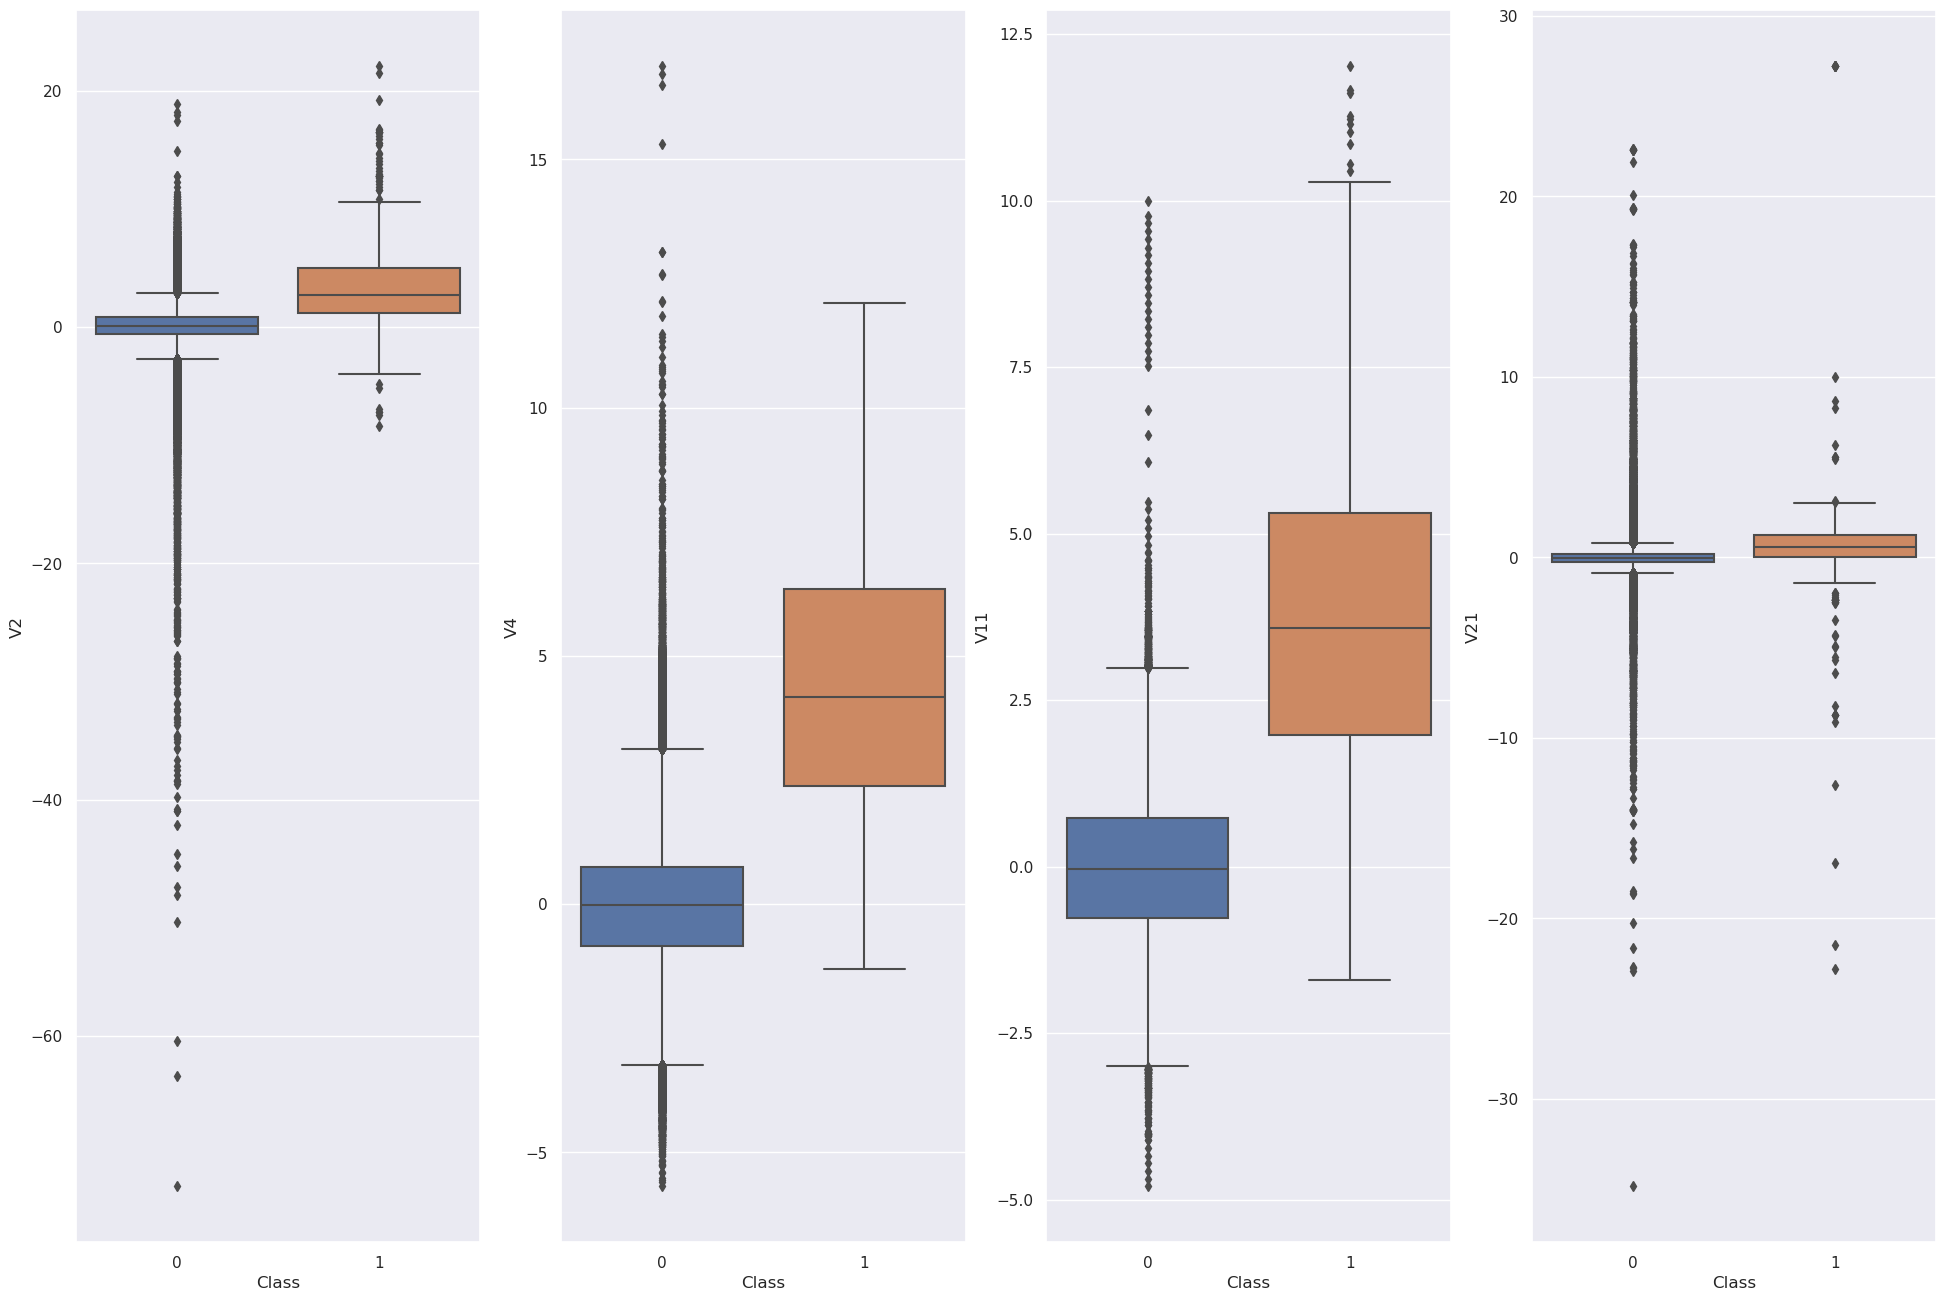

In [17]:
plot_outliers(data, feature_list[4:])

Reminding ourselves:

**TOP 4**  
**Negative Correlations**: V10, V12, V14, V17  
**Positive Correlations**: V2, V4, V11, V21

In [18]:
def remove_outliers(data, feature_list):
    for feat in feature_list:
        feat_fraud = data[feat].loc[data['Class'] == 1].values
        q25, q75 = np.percentile(feat_fraud, 25), np.percentile(feat_fraud, 75)
        print(f'{feat}:')
        print(f'Quartile 25: {q25}, Quartile 75: {q75}')
        feat_iqr = q75 - q25
        print(f'IQR: {feat_iqr}')

        feat_cut_off = feat_iqr * 1.5
        feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
        print(f'Cut Off: {feat_cut_off}')
        print(f'{feat} Lower: {feat_lower}')
        print(f'{feat} Upper: {feat_upper}')

        outliers = [x for x in feat_fraud if x < feat_lower or x > feat_upper]
        print(f'Feature {feat} Outliers for Fraud Cases: {len(outliers)}')
        print(f'{feat} outliers:{outliers}\n')

        data = data.drop(data[(data[feat] > feat_upper) | (data[feat] < feat_lower)].index)
    return data

After.

In [19]:
data = remove_outliers(data, feature_list)

V10:
Quartile 25: -7.7566982278474725, Quartile 75: -2.6141839131895623
IQR: 5.142514314657911
Cut Off: 7.713771471986866
V10 Lower: -15.47046969983434
V10 Upper: 5.099587558797303
Feature V10 Outliers for Fraud Cases: 19
V10 outliers:[-16.6496281595399, -18.2711681738888, -15.5637913387301, -15.5637913387301, -16.7460441053944, -22.1870885620007, -22.1870885620007, -22.1870885620007, -22.1870885620007, -17.1415136412892, -16.3035376590131, -16.2556117491401, -16.6011969664137, -18.9132433348732, -20.9491915543611, -19.836148851696, -23.2282548357516, -24.4031849699728, -24.5882624372475]

V12:
Quartile 25: -8.46396612952571, Quartile 75: -2.82494562476694
IQR: 5.63902050475877
Cut Off: 8.458530757138156
V12 Lower: -16.922496886663865
V12 Upper: 5.633585132371216
Feature V12 Outliers for Fraud Cases: 13
V12 outliers:[-17.7691434633638, -17.6316063138707, -17.2286622386187, -17.1313009454468, -18.0475965708216, -18.6837146333443, -18.5536970096458, -18.4311310279993, -17.1829184301947, 

<Figure size 640x480 with 0 Axes>

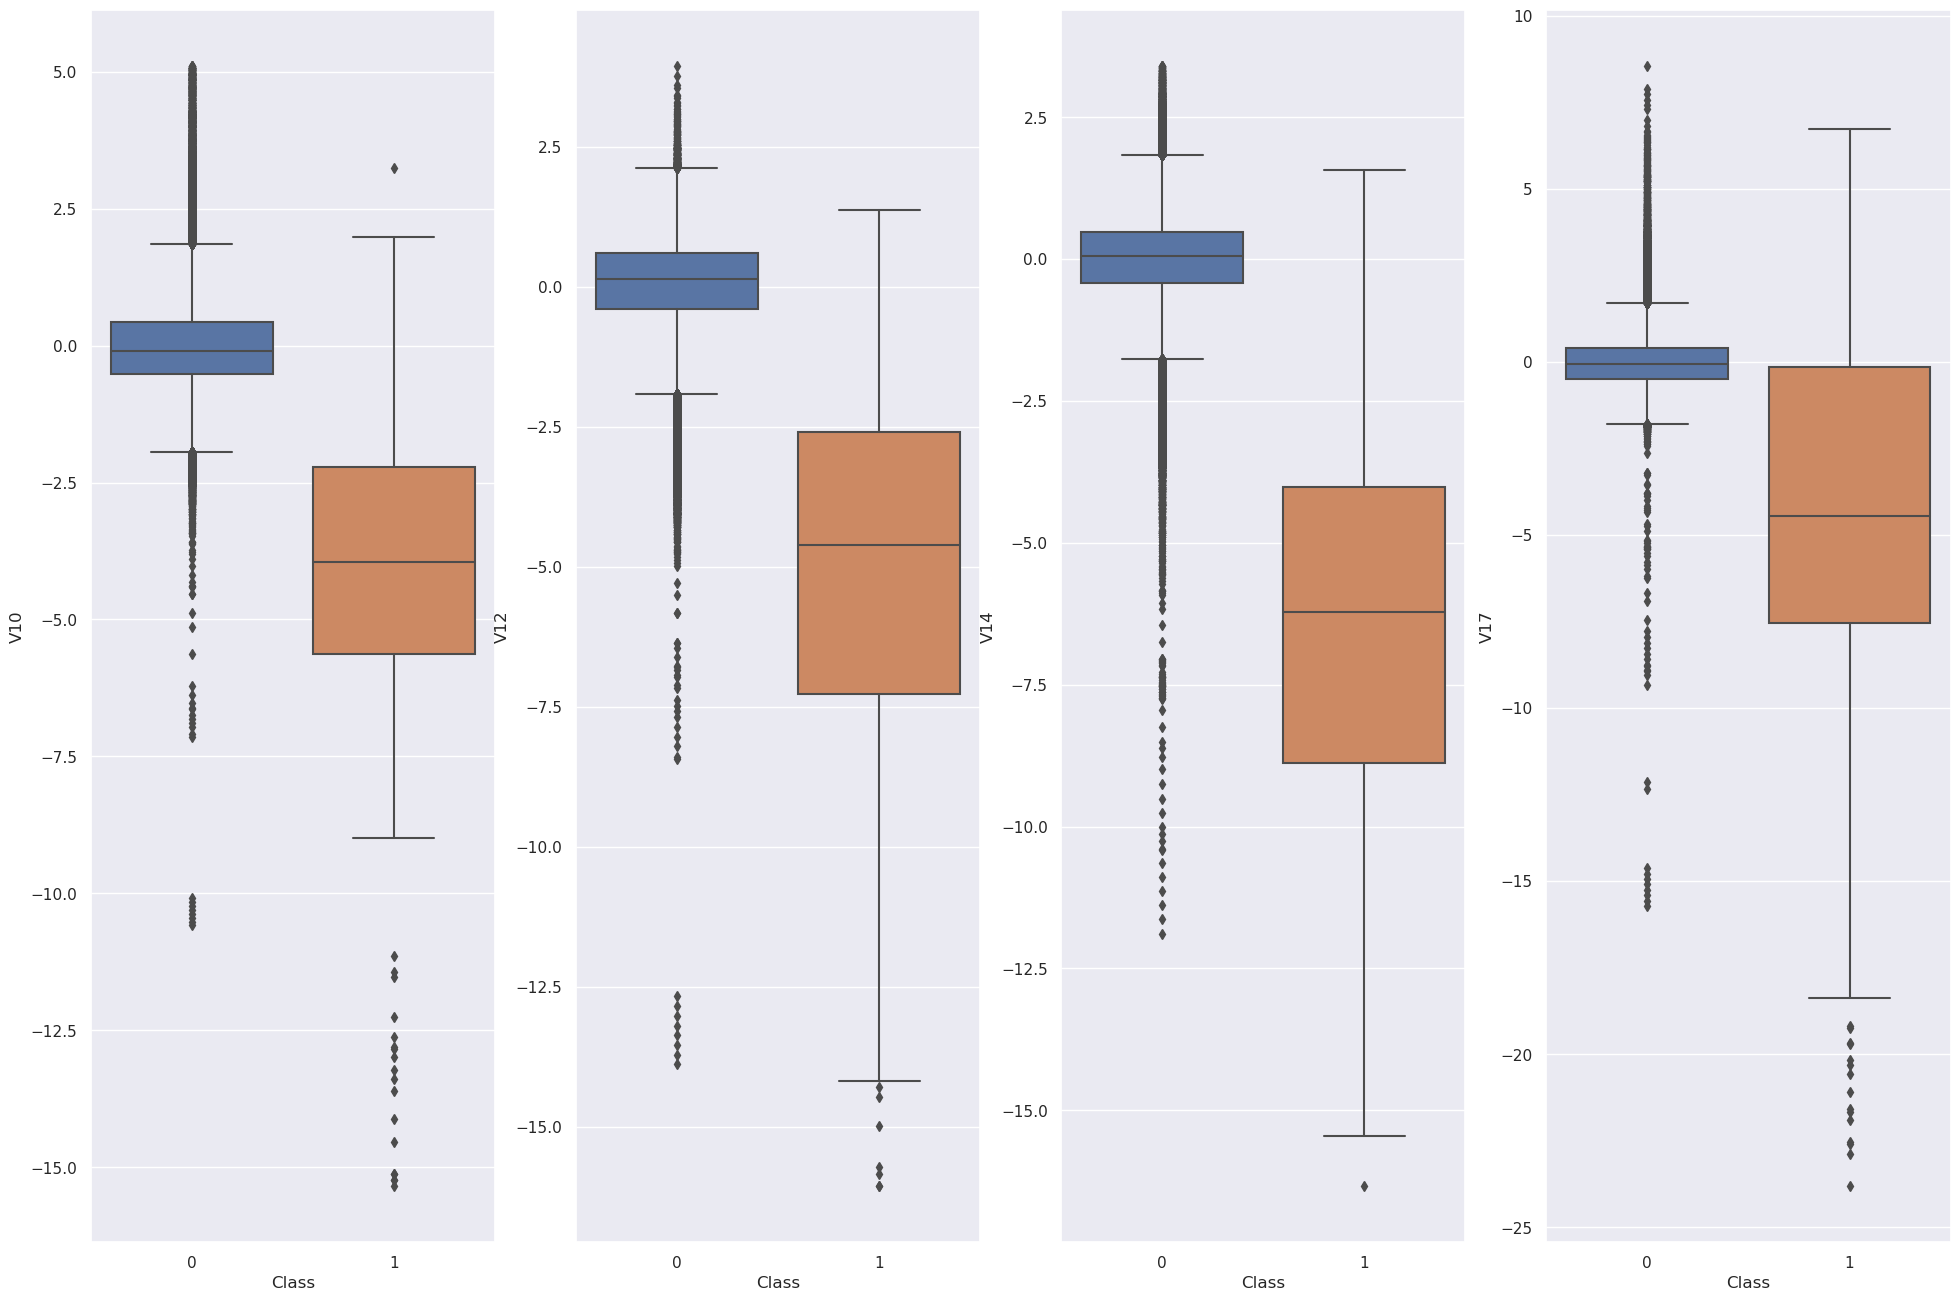

In [20]:
plot_outliers(data, feature_list[:4])

<Figure size 640x480 with 0 Axes>

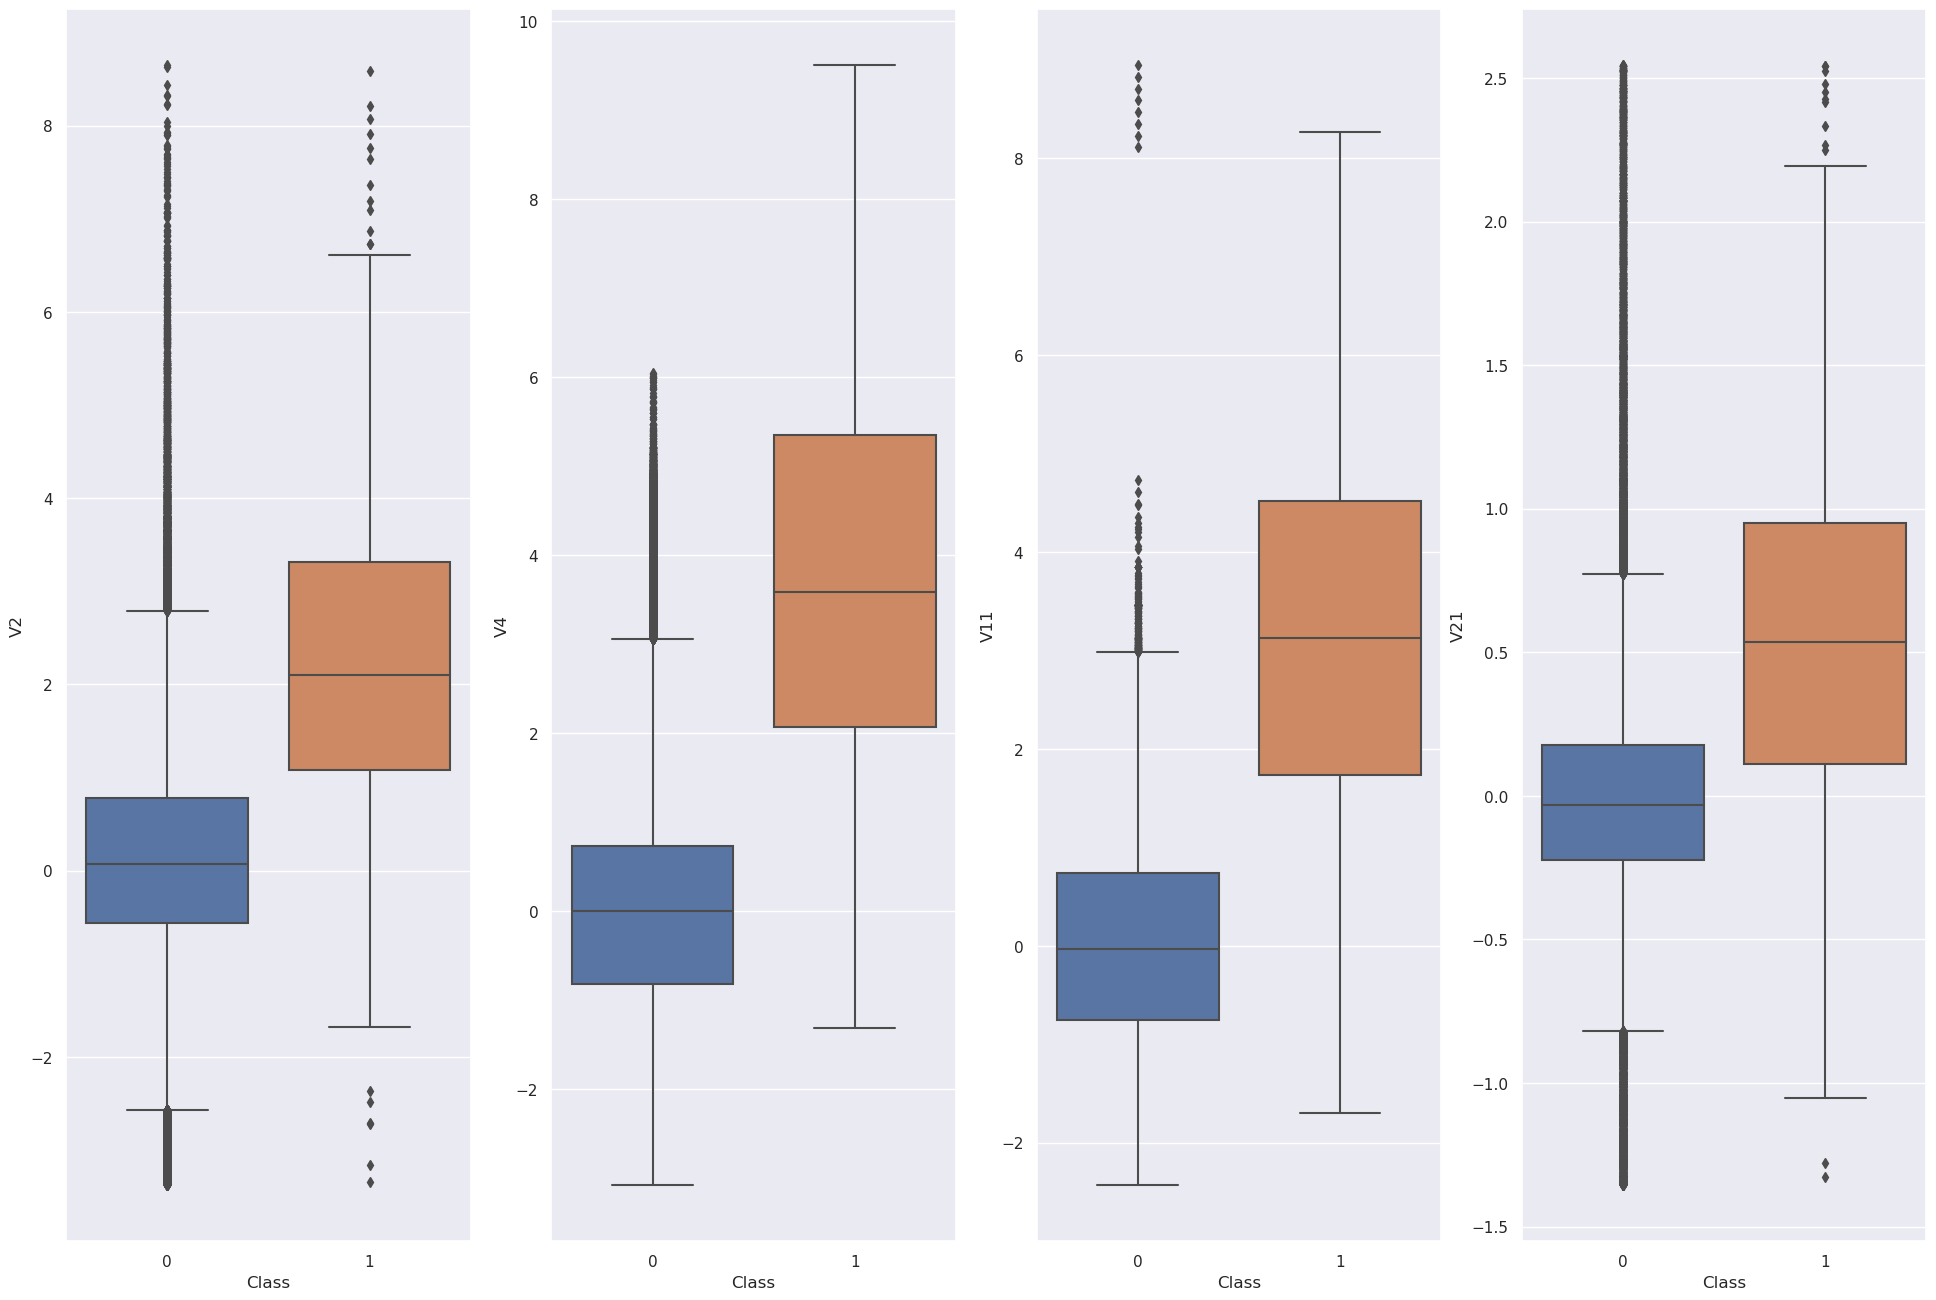

In [21]:
plot_outliers(data, feature_list[4:])

# Modelling

In [22]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [23]:
from sklearn.model_selection import StratifiedKFold

sss = StratifiedKFold(n_splits = 5)

for train, test in sss.split(X,y):
    og_Xtrain, og_Xtest = X.iloc[train], X.iloc[test]
    og_ytrain, og_ytest = y.iloc[train], y.iloc[test]
    
og_Xtrain, og_Xtest = og_Xtrain.values, og_Xtest.values
og_ytrain, og_ytest = og_ytrain.values, og_ytest.values

## 1: Undersampling

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

classifiers = {
    'LogReg': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'DT': DecisionTreeClassifier(),
    'XGB': xgb.XGBClassifier()
}

In [25]:
%%time

from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

X = data.drop('Class', axis=1)
y = data['Class']

model_results = {'LogisticRegression': {},
                 'KNeighborsClassifier': {},
                 'SVC': {},
                 'DecisionTreeClassifier': {},
                 'XGBClassifier': {},
                }

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train].values, X.iloc[test].values
    y_train, y_test = y.iloc[train].values, y.iloc[test].values

nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X, y)

for train, test in sss.split(X_train, y_train):
    for i, clf in classifiers.items():
        
        undersample_pipeline = imb_make_pipeline(NearMiss(sampling_strategy='majority'), clf) # undersample the majority
        undersample_model = undersample_pipeline.fit(X_train[train], y_train[train])
        undersample_prediction = undersample_model.predict(og_Xtrain[test])
        
        model_results[clf.__class__.__name__]['accuracy'] = undersample_pipeline.score(og_Xtrain[test], og_ytrain[test])
        model_results[clf.__class__.__name__]['precision'] = precision_score(og_ytrain[test], undersample_prediction)
        model_results[clf.__class__.__name__]['recall'] = recall_score(og_ytrain[test], undersample_prediction)
        model_results[clf.__class__.__name__]['fscore'] = f1_score(og_ytrain[test], undersample_prediction)
        model_results[clf.__class__.__name__]['roc_auc'] = roc_auc_score(og_ytrain[test], undersample_prediction)

CPU times: user 44.3 s, sys: 1.41 s, total: 45.7 s
Wall time: 37.3 s


In [26]:
undersample_results = pd.DataFrame(model_results).T
undersample_results

,accuracy,precision,recall,fscore,roc_auc
LogisticRegression,0.624869,0.003453,0.965517,0.006881,0.794964
KNeighborsClassifier,0.782381,0.005623,0.913793,0.011178,0.847998
SVC,0.765462,0.005414,0.948276,0.010767,0.856746
DecisionTreeClassifier,0.163476,0.001551,0.965517,0.003098,0.563956
XGBClassifier,0.042447,0.001404,1.000000,0.002804,0.520578


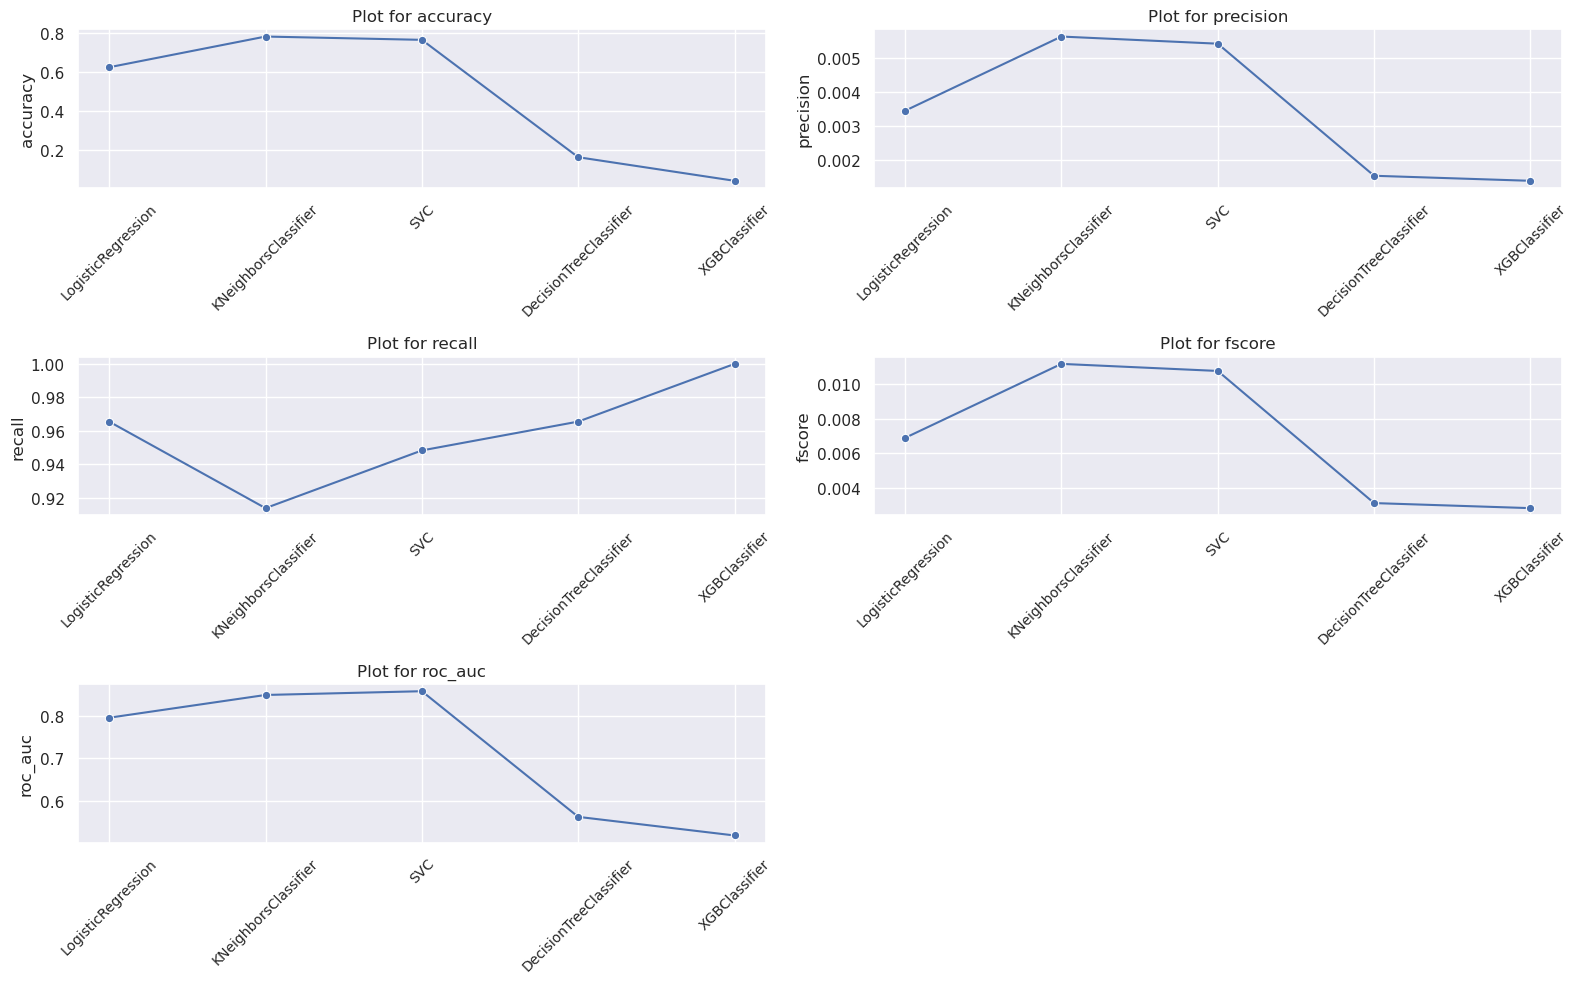

In [27]:
metrics = ['accuracy', 'precision', 'recall', 'fscore', 'roc_auc']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
axes = axes.flatten()
i = 0

for metric in metrics:
    combined = {}
    for clf in model_results.keys():
        combined[clf] = model_results[clf][metric]
    
    sns.lineplot(data=combined, ax=axes[i], marker = 'o')
    axes[i].set_ylabel(f'{metric}', fontsize=12)
    plt.sca(axes[i]) 
    plt.xticks(ticks=np.arange(5), labels=model_results.keys(), rotation=45, fontsize=10)
    plt.title(f'Plot for {metric}')
    
    i += 1

if len(metrics) < len(axes):
    for j in range(len(metrics), len(axes)):
        axes[j].axis('off')

plt.tight_layout()
plt.show()

## 2: Oversampling

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(og_Xtrain, og_ytrain)

In [29]:
%%time

for train, test in sss.split(og_Xtrain, og_ytrain):
    pipeline = imb_make_pipeline(SMOTE(sampling_strategy='minority'), LogisticRegression())
    model = pipeline.fit(og_Xtrain[train], og_ytrain[train])
    prediction = model.predict(og_Xtrain[test])

    lr_accuracy = accuracy_score(og_ytrain[test], prediction)
    lr_precision = precision_score(og_ytrain[test], prediction)
    lr_recall = recall_score(og_ytrain[test], prediction)
    lr_f1 = f1_score(og_ytrain[test], prediction)
    lr_rocauc = roc_auc_score(og_ytrain[test], prediction)

CPU times: user 40.3 s, sys: 7.62 s, total: 48 s
Wall time: 25.5 s


In [30]:
undersampled_lr = model_results['LogisticRegression']['accuracy']
print(f'Oversampled Logistic Regression accuracy: {lr_accuracy}')
print(f'Undersampled Logistic Regression accuracy: {undersampled_lr}')

Oversampled Logistic Regression accuracy: 0.9794611153658707
Undersampled Logistic Regression accuracy: 0.6248694562417322


# 3: Neural Networks

Using SMOTE resampled data.

In [31]:
import tensorflow as tf
import tensorflow.keras.layers as layers

In [32]:
input_shape = Xsm_train.shape[1]

inputs = layers.Input(shape = input_shape, dtype = tf.float32)
x = layers.Dense(128, activation = 'relu')(inputs)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
             )

model_ckpt = tf.keras.callbacks.ModelCheckpoint(filepath = '/kaggle/working/model.ckpt',
                                               save_best_only = True,
                                               save_weights_only =  True,
                                               verbose = 1)

history = model.fit(Xsm_train, ysm_train,
                   epochs = 5,
                   validation_split = 0.2,
                   batch_size = 128,
                   shuffle = True,
                   verbose = 1)

Epoch 1/5
2690/2690 [==============================] - 19s 4ms/step - loss: 0.0465 - accuracy: 0.9832 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 2/5
2690/2690 [==============================] - 11s 4ms/step - loss: 0.0095 - accuracy: 0.9975 - val_loss: 0.0020 - val_accuracy: 0.9998
Epoch 3/5
2690/2690 [==============================] - 12s 4ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4/5
2690/2690 [==============================] - 12s 5ms/step - loss: 0.0051 - accuracy: 0.9988 - val_loss: 9.2667e-04 - val_accuracy: 1.0000
Epoch 5/5
2690/2690 [==============================] - 12s 4ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0012 - val_accuracy: 1.0000


In [33]:
model_pred_probs = model.predict(og_Xtest)
model_preds = tf.cast(tf.round(model_pred_probs), tf.int16)
acc = accuracy_score(og_ytest, model_preds)

1684/1684 [==============================] - 3s 2ms/step


In [34]:
acc

0.9994058891240578